In [1]:
#importing dependencies
import numpy as np
import csv

In [2]:
#laoding dataset
data = []
with open('./framingham.csv','r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        if "NA" not in row:
            data.append([float(x) for x in row])
dataset = np.array(data)

x = dataset[:,:-1]
y = dataset[:,-1]

x = (x - x.min(axis=0))/(x.max(axis=0) - x.min(axis=0))
x = np.c_[np.ones(x.shape[0]),x]


In [3]:
#sigmod function

def sigmoid(x):
    return 1/(1 + np.exp(-x))
    


In [4]:
#cost function

def cost_func(x,y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(x,weights))
    cost = -(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return np.sum(cost)/m

        

In [5]:
#Gradient Descent

def gradient_descent(x, y, weights, alpha, max_iterations=None,tolerance=1e-7):
    m = len(y)
    cost_record = []
    previous_cost = float('inf')
    i = 0

    while True:
        predict = sigmoid(np.dot(x, weights))
        grad = np.dot(x.T, (predict - y)) / m
        weights -= alpha * grad
        current_cost = cost_func(x, y, weights)
        cost_record.append(current_cost)

        if abs(previous_cost - current_cost) < tolerance:
            print(f"Converged after {i+1} iterations")
            break

        if max_iterations is not None and i >= max_iterations - 1:
            print(f"Stopped after reaching max_iterations: {max_iterations}")
            break

        previous_cost = current_cost
        i += 1

    return cost_record, weights



In [6]:
#Initializing the models and parameters

weights = np.zeros(x.shape[1])
alpha = 0.01
iterations = 10000

cost_values, weights = gradient_descent(x,y,weights,alpha) #training the model
print(weights)

Converged after 54486 iterations
[-3.42403118  0.47370395  2.12463701 -0.2928989   0.12975583  0.70629717
  0.35142273  0.31346812  0.58193547  0.6662753   0.12207606  0.93573022
 -0.03045768 -0.25254877 -0.53318852  0.48059215]


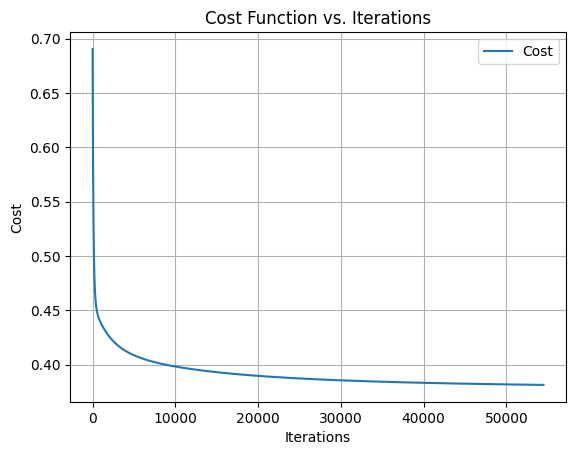

In [7]:
#Plotting cost funcitons
import matplotlib.pyplot as plt

plt.plot(range(len(cost_values)), cost_values, label="Cost")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function vs. Iterations")
plt.legend()
plt.grid()
plt.show()

In [8]:
#testing data
data2 = []
with open('./test_data.csv','r') as file:
    reader = csv.reader(file)
    print(reader)
    for row in reader:
        print(row)
        if "NA" not in row:
            data2.append([float(x) for x in row])
test_data = np.array(data2)
x_test = test_data[:,:-1]
y_test = test_data[:,-1]

x_test = (x_test - x_test.min(axis=0))/(x_test.max(axis=0) - x_test.min(axis=0))
x_test = np.c_[np.ones(x_test.shape[0]),x_test]


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
['0', '56', '3', '1', '5', '0', '0', '0', '0', '230', '123', '78.5', '24.71', '76', '87', '1']
['0', '63', '1', '0', '0', '0', '0', '1', '1', '236', '155', '82', '39.17', '78', '79', '0']
['0', '59', '3', '1', '20', '0', '0', '0', '0', '251', '125', '80', '22.18', '70', '70', '0']
['0', '63', '1', '0', '0', '0', '0', '1', '0', '266', '167', '94', '25.23', '95', '94', '0']
['0', '52', '1', '0', '0', '0', '0', '0', '0', '265', '137.5', '84.5', '26.91', '72', '86', '0']
['1', '48', '1', '0', '0', '0', '0', '0', '0', '204', '125', '84.5', '22.37', '65', '75', '0']
['1', '60', '1', '0', '0', '0', '0', '0', '0', '252', '128', '82', '21.18', '75', '70', '1']
['1', '50', '1', '0', '0', '0', '0', '0', '0', '260', '119', '74', '21.85', '80', '72', '1']
['1', '53', '3', '0', '0', '0', '0', '1', '0', '289', '188', '110', '26.7', '70', '63', '0']
['1', '56', '4', '0', '0', '1', '0', '1', '0', '287', '149', '98', 

In [9]:
#Testing the model
results = sigmoid(np.dot(x_test, weights))
print(results, weights)
output = (results >= 0.5).astype(int)

accuracy = np.mean(output == y_test)
print(accuracy*100)

[0.19574483 0.1885749  0.27346899 0.25476505 0.27706013 0.1943725
 0.24894778 0.32006109 0.24120681 0.31148598 0.27043018 0.22197848
 0.32160898 0.30722049 0.21556452 0.28133875 0.28323411 0.4641615
 0.35683015 0.3924262  0.18154818] [-3.42403118  0.47370395  2.12463701 -0.2928989   0.12975583  0.70629717
  0.35142273  0.31346812  0.58193547  0.6662753   0.12207606  0.93573022
 -0.03045768 -0.25254877 -0.53318852  0.48059215]
61.904761904761905


In [10]:
results = sigmoid(np.dot(x, weights))
print(results, weights)
output = (results >= 0.5).astype(int)

accuracy = np.mean(output == y)
print(accuracy*100)

[0.0496207  0.05438116 0.15538683 ... 0.29244318 0.19516842 0.09165259] [-3.42403118  0.47370395  2.12463701 -0.2928989   0.12975583  0.70629717
  0.35142273  0.31346812  0.58193547  0.6662753   0.12207606  0.93573022
 -0.03045768 -0.25254877 -0.53318852  0.48059215]
85.06564551422319
